In [7]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt

import rsatoolbox

In [21]:
# Load model rdms
# TODO: check the paper reference regarding the voxel, to understand 
# what it means and how the dat was actualy generated

# NOTE: data can be found here: https://github.com/rsagroup/rsatoolbox
matlab_data = io.matlab.loadmat('rdms_inferring/modelRDMs_A2020.mat')
matlab_data = matlab_data['modelRDMs']
n_models = len(matlab_data[0])
model_names = [matlab_data[0][i][0][0] for i in range(n_models)]; model_names
measurement_model = [matlab_data[0][i][1][0] for i in range(n_models)]; measurement_model
rdms_array = np.array([matlab_data[0][i][3][0] for i in range(n_models)]); rdms_array.shape

(63, 4186)

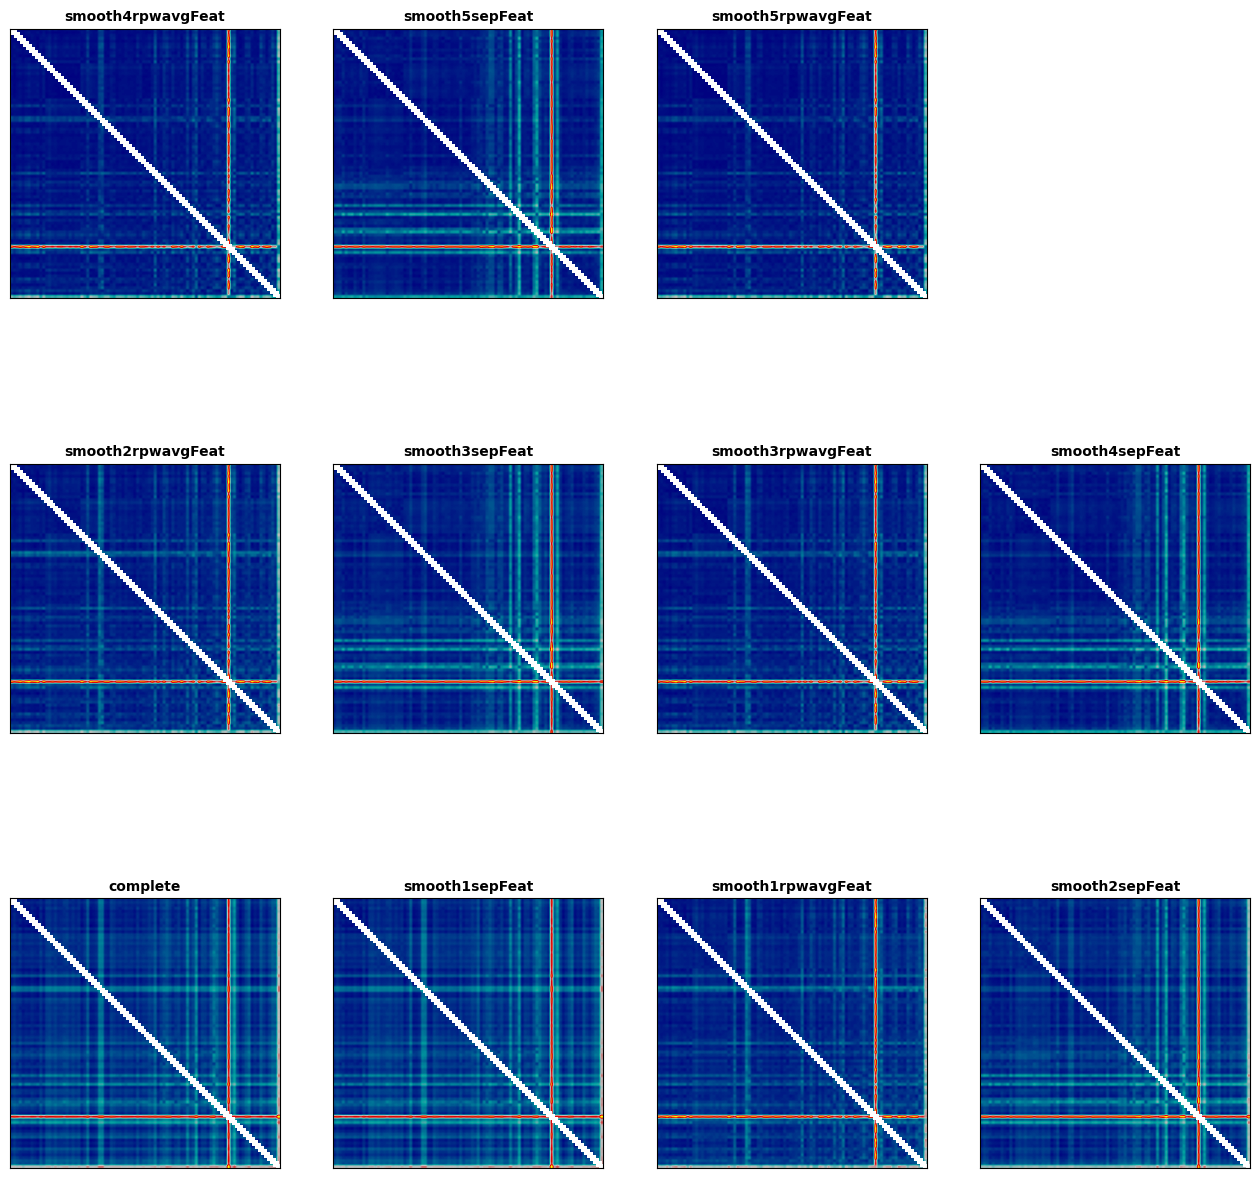

In [24]:
model_rdms = rsatoolbox.rdm.RDMs(rdms_array,
                            rdm_descriptors={'brain_computational_model':model_names,
                                             'measurement_model':measurement_model},
                            dissimilarity_measure='Euclidean'
                           )

conv1_rdms = model_rdms.subset('brain_computational_model','conv1')
fig, ax, ret_val = rsatoolbox.vis.show_rdm(conv1_rdms, rdm_descriptor='measurement_model', figsize=(16,16))